# Measuring Churn

### Data Import and Packages

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [5]:
# importing raw csv file as pandas dataframe
df = pd.read_csv('../data/raw/BankChurners.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

## Churn Rate

### Calculating churn rate

Customers who no longer use the service are considered churners. At a point in time prior to the time at which measurements were taken in the data, a number of customers equal to the sumber of rows $10127$ signed up for the service. Once the data was generated, a portion of those customers were retained, and another portion churned. The *churn rate* is thus the proportion of total customers who have left the service:  

$$ChurnRate=\frac{\#ChurnedCustomers}{\#StartingCustomers}$$

The data tells us that some customers have churned, so we can look at these proportions to calculate the churn rate.

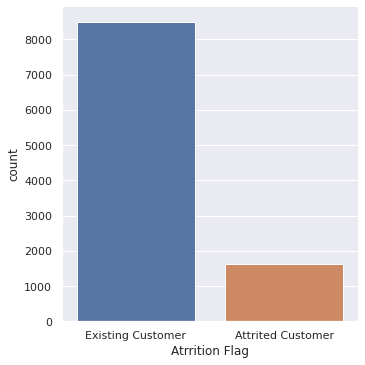

In [25]:
# plotting values of Attrition_Flag column
g = sns.catplot(data=df, kind='count', x='Attrition_Flag')
g.set_axis_labels('Atrrition Flag')
plt.show()

In [14]:
# number of churned customers
CC = df[df['Attrition_Flag'] =='Attrited Customer'].shape[0]
print('# Churned Customers = {}'.format(CC))

# number of starting (total) customers
SC = df.shape[0]
print('# Starting Customers = {}'.format(SC))

#churn rate
CR = CC/SC
print('Churn Rate = {}%'.format(round(CR, 3)))

# Churned Customers = 1627
# Starting Customers = 10127
Churn Rate = 0.161%


Plugging in these numbers to the churn rate formula:  

$$ChurnRate=\frac{1627}{10127}=0.161\%$$

Since the data does not include date variables, we are making an assumption that all accounts included in the data were new users at around the same time. This is necessary for calculating churn, because the churn rate should not include newly acquired accounts. The churn rate is exclusively focused on the set of customers that were acquired at the same time (or at least within a reasonably small time window). We can also calculate the retention rate by looking at the proportion of existing customers over total customers:

$$RetentionRate=\frac{\#ExistingCustomers}{\#StartingCustomers}$$

In [16]:
# number of existing customers
CC = df[df['Attrition_Flag'] =='Existing Customer'].shape[0]
print('# Existing Customers = {}'.format(CC))
print('# Starting Customers = {}'.format(SC))

#churn rate
RR = CC/SC
print('Retention Rate = {}%'.format(round(RR, 3)))

# Existing Customers = 8500
# Starting Customers = 10127
Retention Rate = 0.839%


### Relationship between churn and retention

Plugging into the formula:
$$RetentionRate=\frac{8500}{10127}=0.839\%$$

Since customers fall either under `Existing Customer` or `Attrited Customer`, it makes sense that the retention rate is the opposite of the churn rate. Let's explore this relationship.  
The number of starting customers is composed by both customers who churn and customers who are retained:

$$\#StartingCustomers = \#ChurnedCustomers + \#ExistingCustomers$$

We'll use shorter abbreviations for these variables from now on. The three terms in the equation are $Start$, $Churn$, and $Retention$ respectively. We can divide both sides of the equation by $\#StartingCustomers$ to get $1$ on the left-hand side:

$$\frac{Start}{Start}=\frac{Churn}{Start} + \frac{Retention}{Start}$$

The fractions on the right-hand side of the equation were already defined as the churn rate and the retention rate, which leads to the following identity:

$$100\%=ChurnRate+RetentionRate$$

Since $ChurnRate$ and $RetentionRate$ add up to $100\%$, calculating one will lead to the other and it doesn't make a difference which one is used for analysis. We will stick with churn rate since the purpose of this analysis is to reduce churn.

## Churn Data